In [31]:
import pandas as pd

In [32]:
# CSV 파일을 읽기
df = pd.read_csv("C:/Users/rlarb/Downloads/2018Floor6.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          264960 non-null  object 
 1   z1_AC1(kW)    264487 non-null  float64
 2   z1_Light(kW)  264458 non-null  float64
 3   z1_Plug(kW)   264428 non-null  float64
 4   z1_S1(degC)   101122 non-null  float64
 5   z1_S1(RH%)    101122 non-null  float64
 6   z1_S1(lux)    101122 non-null  float64
 7   z2_AC1(kW)    264486 non-null  float64
 8   z2_Light(kW)  264458 non-null  float64
 9   z2_Plug(kW)   264526 non-null  float64
 10  z2_S1(degC)   103434 non-null  float64
 11  z2_S1(RH%)    103434 non-null  float64
 12  z2_S1(lux)    103434 non-null  float64
 13  z3_Light(kW)  264527 non-null  float64
 14  z3_Plug(kW)   264519 non-null  float64
 15  z4_AC1(kW)    262746 non-null  float64
 16  z4_AC2(kW)    262746 non-null  float64
 17  z4_AC3(kW)    262746 non-null  float64
 18  z4_A

In [34]:
#Date칼럼 datetime형식변환
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
#결측치 처리(이전데이터로 결측치 재우기)
df.fillna(method='ffill', inplace=True)


In [37]:
# 'AC', 'Light', 'Plug' 단어를 포함한 칼럼들을 찾아 합산하여 새로운 칼럼으로 추가
ac_columns = [col for col in df.columns if 'AC' in col]
light_columns = [col for col in df.columns if 'Light' in col]
plug_columns = [col for col in df.columns if 'Plug' in col]

df['be_ac_energy'] = df[ac_columns].sum(axis=1)
df['be_light_energy'] = df[light_columns].sum(axis=1)
df['be_plug_energy'] = df[plug_columns].sum(axis=1)

In [38]:
# 'Date' 칼럼명을 'be_date'로 변경
df.rename(columns={'Date': 'be_date'}, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   be_date          264960 non-null  datetime64[ns]
 1   z1_AC1(kW)       264960 non-null  float64       
 2   z1_Light(kW)     264960 non-null  float64       
 3   z1_Plug(kW)      264960 non-null  float64       
 4   z1_S1(degC)      264960 non-null  float64       
 5   z1_S1(RH%)       264960 non-null  float64       
 6   z1_S1(lux)       264960 non-null  float64       
 7   z2_AC1(kW)       264960 non-null  float64       
 8   z2_Light(kW)     264960 non-null  float64       
 9   z2_Plug(kW)      264960 non-null  float64       
 10  z2_S1(degC)      264960 non-null  float64       
 11  z2_S1(RH%)       264960 non-null  float64       
 12  z2_S1(lux)       264960 non-null  float64       
 13  z3_Light(kW)     264960 non-null  float64       
 14  z3_Plug(kW)      264

In [44]:
# 'S'로 시작하는 열을 선택
columns_with_S = df.filter(regex='^z\d+_S\d+\(.+').columns

# 괄호 안의 단위를 추출하여 그룹화하고 평균값을 계산하여 새로운 열에 저장
for column in columns_with_S:
    unit = column.split('(')[-1][:-1]  # 괄호 안의 단위 추출
    new_column_name = f'be_in_{unit}'  # 새로운 열 이름 생성
    df[new_column_name] = df.filter(like=column).mean(axis=1)  # 평균값 계산 및 저장

# 'S'로 시작하는 열 삭제
df = df.drop(columns=columns_with_S)

# 결과 확인
print(df.head())


              be_date  z1_AC1(kW)  z1_Light(kW)  z1_Plug(kW)  z2_AC1(kW)  \
0 2018-07-01 00:00:00         0.0           0.0         0.31         0.0   
1 2018-07-01 00:01:00         0.0           0.0         0.31         0.0   
2 2018-07-01 00:02:00         0.0           0.0         0.31         0.0   
3 2018-07-01 00:03:00         0.0           0.0         0.26         0.0   
4 2018-07-01 00:04:00         0.0           0.0         0.26         0.0   

   z2_Light(kW)  z2_Plug(kW)  z3_Light(kW)  z3_Plug(kW)  z4_AC1(kW)  ...  \
0          0.01         0.13          0.02         0.27         0.0  ...   
1          0.01         0.13          0.02         0.27         0.0  ...   
2          0.01         0.13          0.02         0.27         0.0  ...   
3          0.01         0.13          0.02         0.27         0.0  ...   
4          0.01         0.13          0.02         0.27         0.0  ...   

   z4_Plug(kW)  z5_AC1(kW)  z5_Light(kW)  z5_Plug(kW)  be_ac_energy  \
0         0.07 

In [45]:
df.rename(columns={'be_in_RH%': 'be_in_rh'}, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   be_date          264960 non-null  datetime64[ns]
 1   z1_AC1(kW)       264960 non-null  float64       
 2   z1_Light(kW)     264960 non-null  float64       
 3   z1_Plug(kW)      264960 non-null  float64       
 4   z1_S1(degC)      264960 non-null  float64       
 5   z1_S1(RH%)       264960 non-null  float64       
 6   z1_S1(lux)       264960 non-null  float64       
 7   z2_AC1(kW)       264960 non-null  float64       
 8   z2_Light(kW)     264960 non-null  float64       
 9   z2_Plug(kW)      264960 non-null  float64       
 10  z2_S1(degC)      264960 non-null  float64       
 11  z2_S1(RH%)       264960 non-null  float64       
 12  z2_S1(lux)       264960 non-null  float64       
 13  z3_Light(kW)     264960 non-null  float64       
 14  z3_Plug(kW)      264

In [46]:
# 필요한 칼럼들만 선택하여 재생성
df = df[['be_date', 'be_ac_energy', 'be_light_energy', 'be_plug_energy','be_in_degC','be_in_rh','be_in_lux']]

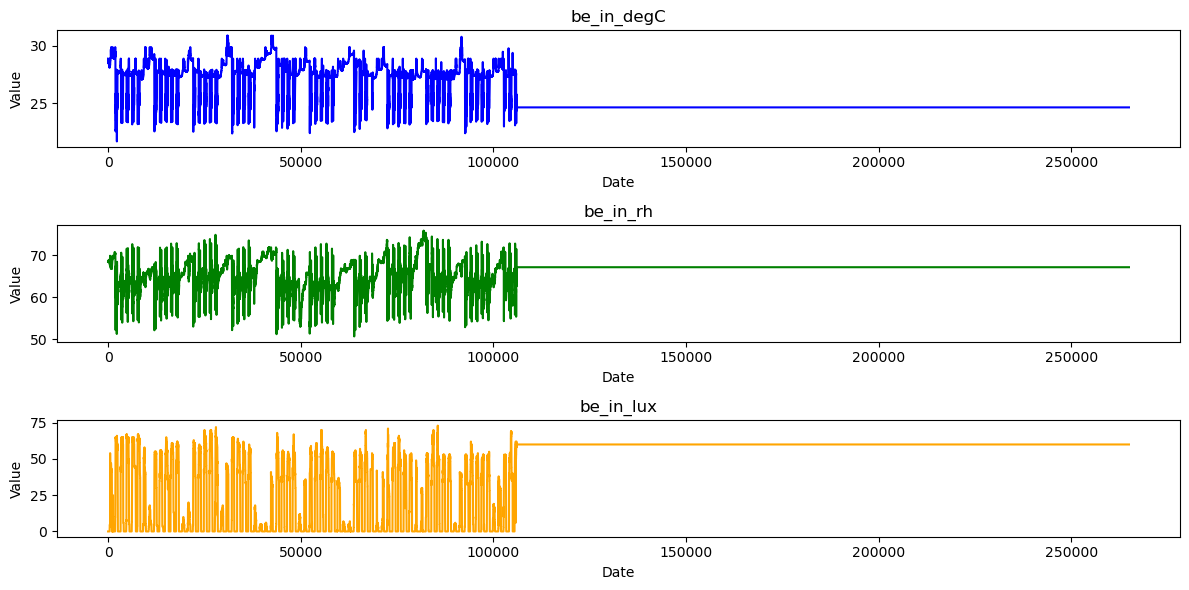

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 'be_in_degC'의 데이터 변화 시각화
plt.subplot(3, 1, 1)
plt.plot(df['be_in_degC'], color='blue')
plt.title('be_in_degC')
plt.xlabel('Date')
plt.ylabel('Value')

# 'be_in_rh'의 데이터 변화 시각화
plt.subplot(3, 1, 2)
plt.plot(df['be_in_rh'], color='green')
plt.title('be_in_rh')
plt.xlabel('Date')
plt.ylabel('Value')

# 'be_in_lux'의 데이터 변화 시각화
plt.subplot(3, 1, 3)
plt.plot(df['be_in_lux'], color='orange')
plt.title('be_in_lux')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()



In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   be_date          264960 non-null  datetime64[ns]
 1   be_ac_energy     264960 non-null  float64       
 2   be_light_energy  264960 non-null  float64       
 3   be_plug_energy   264960 non-null  float64       
 4   be_in_degC       264960 non-null  float64       
 5   be_in_rh         264960 non-null  float64       
 6   be_in_lux        264960 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.2 MB


In [49]:
# 'be_floor' 칼럼생성후 층수입력
df['be_floor'] = 6

In [50]:
df.head()

,be_date,be_ac_energy,be_light_energy,be_plug_energy,be_in_degC,be_in_rh,be_in_lux,be_floor
0,2018-07-01 00:00:00,0.0,0.03,0.79,28.9,68.48,0.0,6
1,2018-07-01 00:01:00,0.0,0.03,0.78,28.9,68.48,0.0,6
2,2018-07-01 00:02:00,0.0,0.03,0.83,28.9,68.50,0.0,6
3,2018-07-01 00:03:00,0.0,0.03,0.89,28.9,68.51,0.0,6
4,2018-07-01 00:04:00,0.0,0.03,0.88,28.9,68.52,0.0,6


In [51]:
# 전처리된 데이터프레임을 새로운 CSV 파일로 저장
df.to_csv('be_6.csv', index=False)